So I just saw this video: https://www.youtube.com/watch?v=iq0aCH3O664;
The guy claims to have created an algorithm that guesses a person's age by their age. His algorithm does this with a pathetic 97% accuracy. I think I can do it better. Let's see...

Importing the modules

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

Creating train and test data

In [14]:
d = {'age': np.random.randint(50, size=1000)}
x_train = pd.DataFrame(data=d)
x_train['age'] = x_train['age'].apply(str)

In [22]:
d = {'age': np.random.randint(50, size=200)}
x_test = pd.DataFrame(data=d)
x_test['age'] = x_test['age'].apply(str)

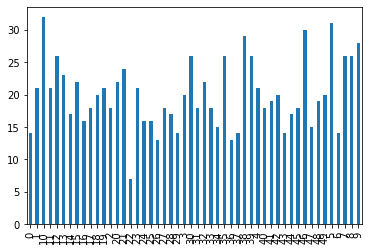

In [15]:
x_train['age'].value_counts().sort_index().plot.bar()

In [5]:
x_train.describe()

,age
count,1000.000000
mean,24.209000
std,14.150391
min,0.000000
25%,13.000000
50%,24.000000
75%,36.000000
max,49.000000


In [23]:
y_train = x_train['age']
y_test = x_test['age']

Manipulating the data a little bit

In [24]:
#created dummy variables from categories (also can use OneHotEncoder)
x_train_dummies = pd.get_dummies(x_train[['age']])

In [25]:
x_train_dummies

,age_0,age_1,age_10,age_11,age_12,age_13,age_14,age_15,age_16,age_17,...,age_45,age_46,age_47,age_48,age_49,age_5,age_6,age_7,age_8,age_9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score 

Trying out the model. Seems to be great. Perfect, actually

In [26]:
#I usually use Naive Bayes as a baseline for my classification tasks 
gnb = GaussianNB()
cv = cross_val_score(gnb,x_train_dummies,y_train,cv=10)
print(cv)
print(cv.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  UserWarning,


Finally training it FOR REAL

In [28]:
gnb.fit(x_train_dummies,y_train)

GaussianNB()

Preparing test data to be eaten by the model

In [29]:
x_test_dummies = pd.get_dummies(x_test[['age']])

It's ready. Here you can see what age was the a certain person:

In [30]:
x_test_dummies[x_test_dummies == 1].loc[69].dropna()

age_34    1.0
Name: 69, dtype: float64

And here's what machine thinks his age is:

In [32]:
gnb.predict([x_test_dummies.loc[69]])[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


'34'

In [33]:
for i in range(10):
  print(x_test_dummies[x_test_dummies == 1].loc[i].dropna(), gnb.predict([x_test_dummies.loc[i]])[0])

age_37    1.0
Name: 0, dtype: float64 37
age_35    1.0
Name: 1, dtype: float64 35
age_7    1.0
Name: 2, dtype: float64 7
age_44    1.0
Name: 3, dtype: float64 44
age_13    1.0
Name: 4, dtype: float64 13
age_10    1.0
Name: 5, dtype: float64 10
age_19    1.0
Name: 6, dtype: float64 19
age_49    1.0
Name: 7, dtype: float64 49
age_8    1.0
Name: 8, dtype: float64 8
age_35    1.0
Name: 9, dtype: float64 35


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
